In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data.csv')

In [4]:
#pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
columnas = df.columns.tolist()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

# Cleaning

In [8]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Loaned From','Release Clause','Joined'], axis=1, inplace=True)

In [9]:
df.shape

(18207, 82)

In [10]:
nulos = df.isnull().sum()

In [11]:
df['Club'] = df['Club'].fillna('Sin Club')

In [12]:
df = df.dropna(axis=0, how='any')

In [13]:
df.shape

(15926, 82)

In [14]:
nulos2=df.isnull().sum()

In [15]:
import missingno as msno

<AxesSubplot:>

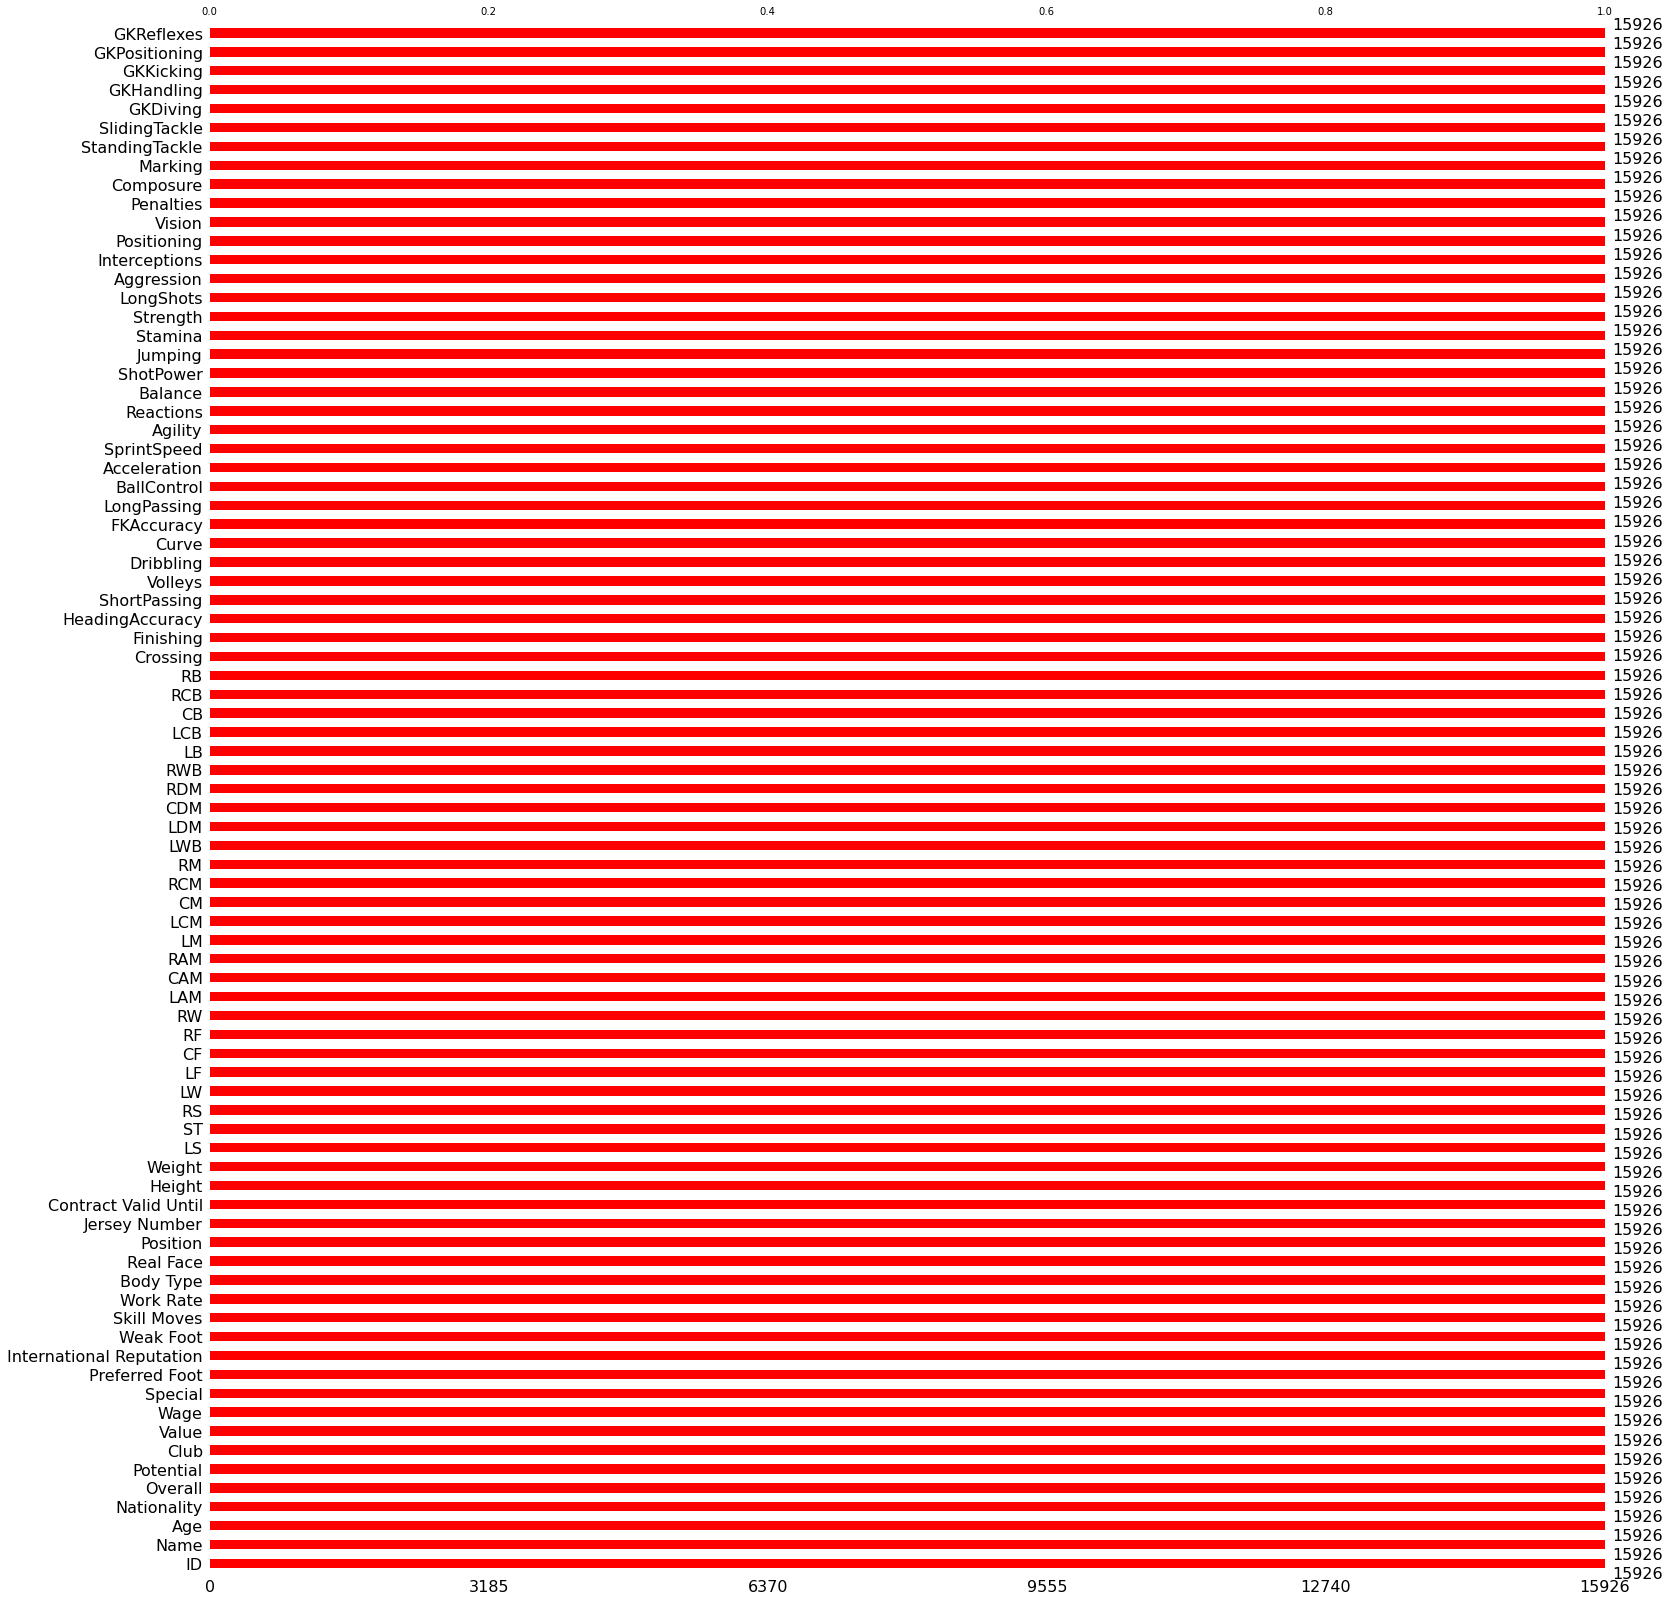

In [16]:
msno.bar(df,color='red')

In [17]:
grupo_paises = df.groupby('Nationality')

In [18]:
chile = grupo_paises.get_group('Chile')

In [19]:
chile.shape

(346, 82)

In [20]:
chile.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
93,184941,A. Sánchez,29,Chile,85,85,Manchester United,€37.5M,€215K,2172,...,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0
96,181872,A. Vidal,31,Chile,85,85,FC Barcelona,€26M,€205K,2230,...,81.0,81.0,82.0,87.0,86.0,4.0,2.0,4.0,2.0,4.0
366,199042,C. Aránguiz,29,Chile,81,81,Bayer 04 Leverkusen,€17M,€76K,2144,...,76.0,76.0,74.0,71.0,72.0,15.0,7.0,12.0,8.0,13.0
369,193532,G. Medel,30,Chile,81,81,Beşiktaş JK,€13M,€56K,1996,...,58.0,78.0,80.0,84.0,79.0,14.0,7.0,9.0,6.0,6.0
843,199827,P. Hernández,31,Chile,78,78,Independiente,€9M,€24K,2022,...,62.0,68.0,55.0,67.0,70.0,6.0,15.0,9.0,15.0,10.0


In [21]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 93 to 18193
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        346 non-null    int64  
 1   Name                      346 non-null    object 
 2   Age                       346 non-null    int64  
 3   Nationality               346 non-null    object 
 4   Overall                   346 non-null    int64  
 5   Potential                 346 non-null    int64  
 6   Club                      346 non-null    object 
 7   Value                     346 non-null    object 
 8   Wage                      346 non-null    object 
 9   Special                   346 non-null    int64  
 10  Preferred Foot            346 non-null    object 
 11  International Reputation  346 non-null    float64
 12  Weak Foot                 346 non-null    float64
 13  Skill Moves               346 non-null    float64
 14  Work Ra

In [22]:
chile.groupby(by=['Age','Club'])['Potential'].mean()

Age  Club                
17   Deportes Iquique        76.0
     San Luis de Quillota    67.0
     Universidad Católica    78.0
     Unión Española          72.5
18   Audax Italiano          73.0
                             ... 
36   San Luis de Quillota    71.0
     Unión La Calera         63.0
37   Club Deportes Temuco    68.0
     Colo-Colo               74.0
38   Universidad de Chile    73.0
Name: Potential, Length: 232, dtype: float64

In [23]:
import matplotlib.pyplot as plt

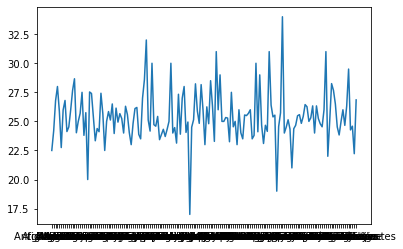

In [24]:
grafico_PB = df.groupby('Nationality')['Age'].mean()
plt.plot(grafico_PB)

In [25]:
mean_age_chile = pd.pivot_table(chile,index='Club', values='Age', aggfunc='count').sort_values('Age',ascending=False)

<AxesSubplot:xlabel='Club'>

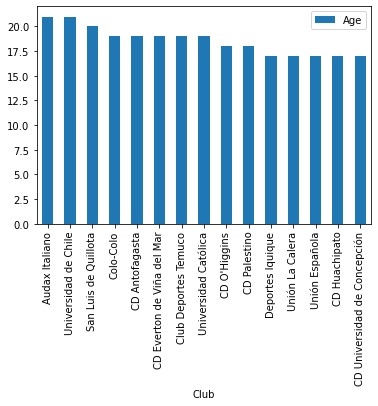

In [26]:
mean_age_chile[0:15].plot(kind='bar')

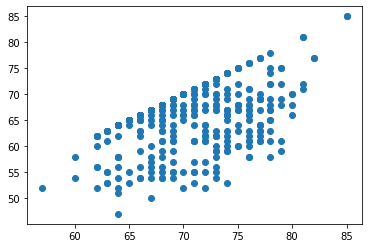

In [27]:
plt.scatter(x=chile['Potential'], y=chile['Overall'])

<AxesSubplot:>

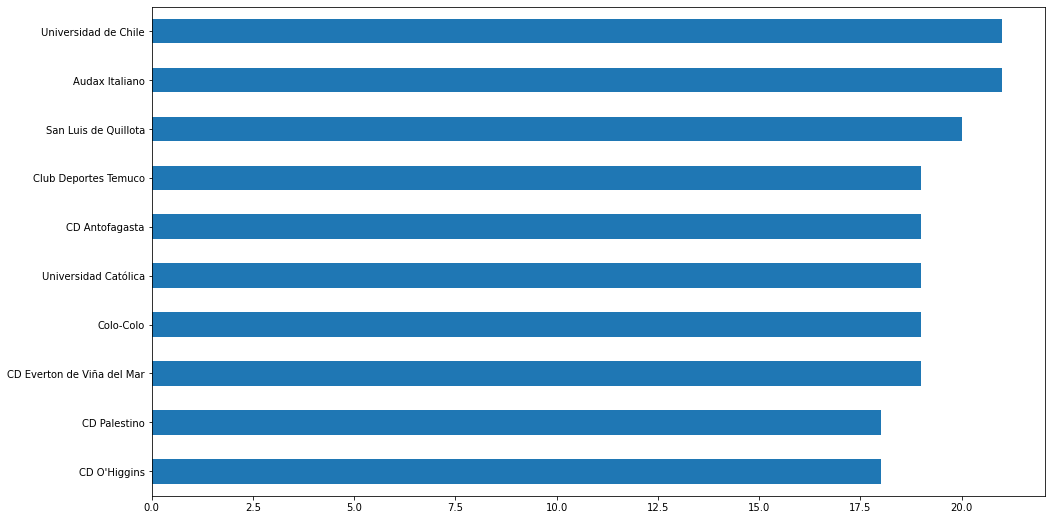

In [28]:
fig=plt.figure(figsize=(16,9))
chile['Club'].value_counts().iloc[0:10].sort_values(ascending=True).plot(kind='barh')

In [29]:
Club_jugadores = chile.groupby(by=['Club'], as_index=True).aggregate({'Club':'count','Age':'mean'})

In [30]:
lista_clubes = Club_jugadores[Club_jugadores['Club']>15]

In [31]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [32]:
grafico_1 = pd.pivot_table(df[0:15],index='Nationality', values=['Age','Overall','Potential'], aggfunc={'Age':'mean','Overall':'max','Potential':'max'})

In [33]:
px.bar(grafico_1, x=grafico_1.index, y=grafico_1['Age'])

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=grafico_1.index, y=grafico_1['Overall']))
fig.add_trace(go.Scatter(x=grafico_1.index, y=grafico_1['Potential']))

In [35]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=grafico_1.index, y=grafico_1['Age'], name="Age"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=grafico_1.index, y=grafico_1['Potential'], name="Potential"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=grafico_1.index, y=grafico_1['Overall'], name="Overall"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

# Tablas dinámicas

In [36]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [37]:
@interact
def tabla_1(pie_preferido=df['Preferred Foot'].unique(), posicion=df['Position'].unique()):
    return pd.pivot_table(df[(df['Preferred Foot']==pie_preferido) & (df['Position']==posicion)], index="Nationality", values=['Age','Potential','Overall'])

interactive(children=(Dropdown(description='pie_preferido', options=('Left', 'Right'), value='Left'), Dropdown…

In [38]:
@interact
def grafico_1(Nacionalidad=df['Nationality'].unique(), club=df['Club'].unique()):
    return pd.pivot_table(df[(df['Nationality']==Nacionalidad) & (df['Club']==club)], index=df["Nationality"], values=['Age','Overall','Potential'], aggfunc='mean')
    #px.bar(dinamica, x=dinamica.index, y=dinamica['Age'])

interactive(children=(Dropdown(description='Nacionalidad', options=('Argentina', 'Portugal', 'Brazil', 'Belgiu…

In [39]:
@interact
def grafico_1(Nacionalidad=df['Nationality'].unique()):
    dinamica = pd.pivot_table(df[(df['Nationality']==Nacionalidad)], index=df["Preferred Foot"], values=['Age','Overall','Potential'], aggfunc='mean')
    return px.bar(dinamica, x=dinamica.index, y=dinamica['Age'])

interactive(children=(Dropdown(description='Nacionalidad', options=('Argentina', 'Portugal', 'Brazil', 'Belgiu…

interactive(children=(Dropdown(description='pie', options=('Left', 'Right'), value='Left'), Output()), _dom_cl…

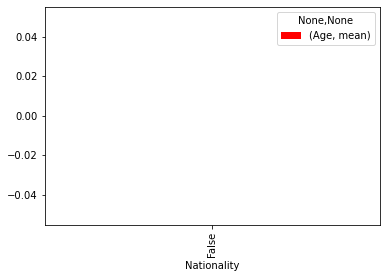

In [40]:
@interact
def grafico_2(pie=df['Preferred Foot'].unique()):
    tabla = pd.pivot_table(df[0:15]==pie,index='Nationality', values=['Age'], aggfunc={'mean'})
    return tabla.plot(kind='bar', color='red')

In [41]:
lista_clubes.mean()

Club    18.375000
Age     24.746119
dtype: float64

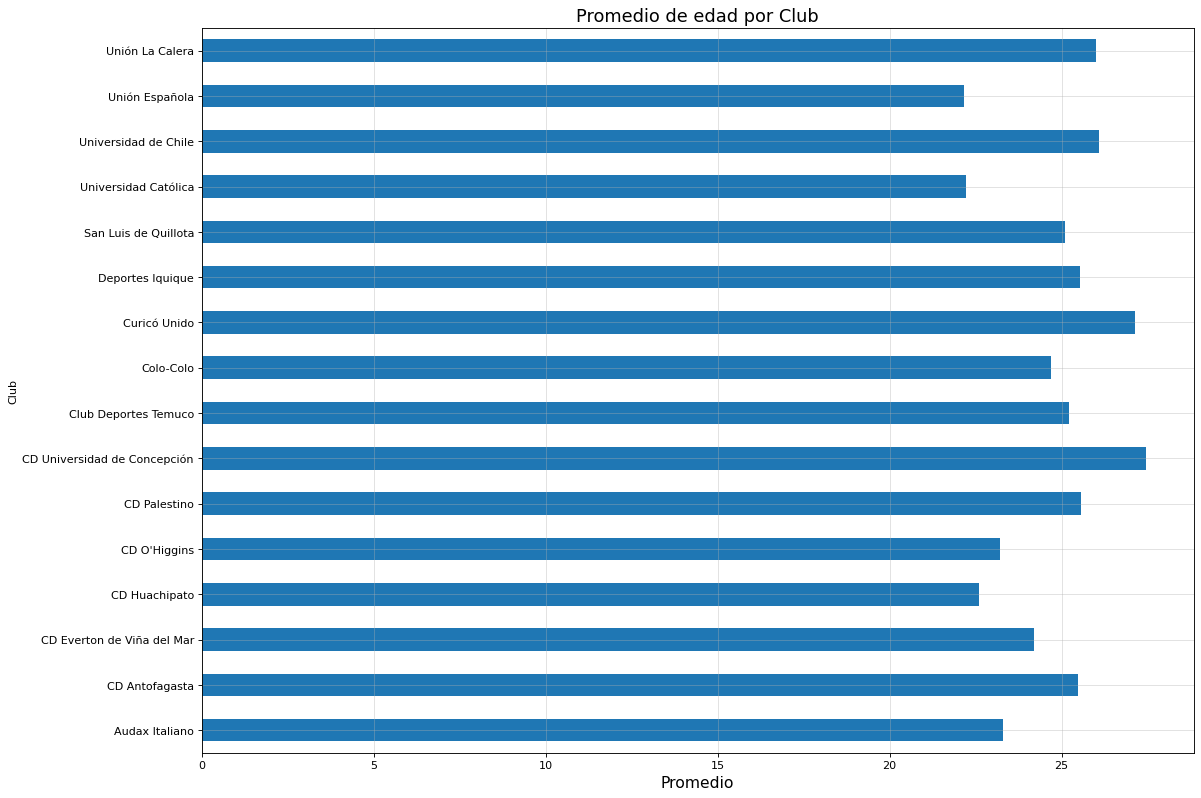

In [42]:
fig = plt.figure(figsize=(16,12), dpi=80)
lista_clubes['Age'].plot(kind='barh')
plt.xlabel('Promedio', fontsize='14')
plt.title('Promedio de edad por Club', fontsize='16')
plt.grid(alpha=0.4)


In [43]:
chile.describe().round(2)

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,346.00,346.00,346.00,346.00,346.00,346.00,346.00,346.00,346.00,346.00,...,346.00,346.00,346.00,346.00,346.00,346.00,346.00,346.00,346.00,346.00
mean,219746.34,25.01,65.23,70.92,1635.96,1.09,2.93,2.46,17.23,53.05,...,51.97,57.28,51.01,49.86,47.51,10.77,10.37,10.17,10.66,10.77
std,21582.47,5.15,6.23,4.93,184.27,0.35,0.61,0.58,9.61,13.61,...,12.76,9.87,16.64,19.70,19.31,3.01,2.96,2.98,3.05,3.09
min,24248.00,17.00,47.00,57.00,1191.00,1.00,2.00,2.00,2.00,21.00,...,20.00,32.00,12.00,10.00,10.00,2.00,2.00,2.00,2.00,2.00
25%,214314.00,21.00,61.25,67.00,1499.50,1.00,3.00,2.00,9.00,43.25,...,41.25,50.00,36.00,33.00,29.25,8.00,8.00,8.00,8.00,8.00
50%,219090.50,24.00,66.00,71.00,1634.50,1.00,3.00,2.00,17.00,55.00,...,52.00,57.00,56.00,58.00,54.00,11.00,10.00,10.00,11.00,11.00
75%,235455.75,29.00,69.00,74.00,1751.00,1.00,3.00,3.00,24.00,64.00,...,61.00,65.00,65.00,66.75,63.00,13.00,13.00,12.75,13.00,13.00
max,246088.00,38.00,85.00,85.00,2230.00,4.00,5.00,5.00,66.00,79.00,...,86.00,84.00,82.00,87.00,86.00,16.00,16.00,16.00,16.00,16.00


In [44]:
chile.describe(include='O')

,Name,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
count,346,346,346,346,346,346,346,346,346,346,...,346,346,346,346,346,346,346,346,346,346
unique,339,1,55,95,30,2,8,3,2,20,...,45,49,49,49,45,46,50,50,50,46
top,R. Escobar,Chile,Audax Italiano,€1.3M,€1K,Right,Medium/ Medium,Normal,No,ST,...,64+2,60+2,60+2,60+2,64+2,64+2,62+2,62+2,62+2,64+2
freq,2,346,21,12,168,265,178,183,338,48,...,20,20,20,20,20,20,21,21,21,20


In [51]:
chile.iloc[:,0:20].corr().round(2).style.background_gradient()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number
ID,1.000000,-0.710000,-0.620000,-0.090000,-0.570000,-0.460000,-0.170000,-0.350000,0.280000
Age,-0.710000,1.000000,0.610000,-0.250000,0.520000,0.310000,0.130000,0.240000,-0.380000
Overall,-0.620000,0.610000,1.000000,0.480000,0.830000,0.490000,0.250000,0.560000,-0.410000
Potential,-0.090000,-0.250000,0.480000,1.000000,0.380000,0.340000,0.230000,0.370000,-0.050000
Special,-0.570000,0.520000,0.830000,0.380000,1.000000,0.460000,0.250000,0.590000,-0.240000
International Reputation,-0.460000,0.310000,0.490000,0.340000,0.460000,1.000000,0.240000,0.320000,-0.100000
Weak Foot,-0.170000,0.130000,0.250000,0.230000,0.250000,0.240000,1.000000,0.230000,0.050000
Skill Moves,-0.350000,0.240000,0.560000,0.370000,0.590000,0.320000,0.230000,1.000000,-0.110000
Jersey Number,0.280000,-0.380000,-0.410000,-0.050000,-0.240000,-0.100000,0.050000,-0.110000,1.000000
